# CSCI 532 Semester Project Demonstration and Analysis

James Avery

## Problem #3

>Write a C/C++/Matlab/Java program to compute insertion sort and merge sort. (You can use the code from the textbooks by Deitel and Deitel or from the web.) Obtain the run time of both routines.

>The input data should be an int array containing random element values (between, say, 0 and 1023). Obtain run time T with 1D (input) array of size of $n = 16$, $256$, $4096$, $65536$, $1048576$ (i.e. $2^p$, where $p = 4$, $8$, $12$, $16$, $20$). The run time for each $n$ should be averaged with about $\left\lfloor{\frac{512}{p \times p}}\right\rfloor$ runs. Each run for a given $n$ should use a different random input.

>Plot (with Excel, Matlab, or other available tools) the run time for both routines on one plot, with the $x$ axis in $p$ values, and $y$ axis in $\log{T}$. Label on the plot which curve is for insertion sort and which is for merge sort.

>Submit C/C++ programs and plot, with instructions in readme.txt on how to build and run the program. (Include the Dev-C++/MS Visual Studio/Java NetBeans project file.)

In addition to the above, I also added a number of command line arguments to make testing more interactive:
* `insertion-only`: Prevents merge sort from being run
* `merge-only`: Prevents insertion sort from being run
* `equal-batches`: Instead of running each sort $\left\lfloor\frac{512}{p\times{p}}\right\rfloor$ times, run in equal-sized batches. This takes a lot longer, but allows for more accurate analysis, as well as processing run-time data in Python using NumPy
* `limit-n`: Limits the size of arrays to those that run quickly, i.e., arrays smaller than around 1 million items. This speeds testing the algorithms' run-times, especially when `equal-batches` is also used.
* `demo-sorters`: Demonstrates the sorting routines (specifically that they actually do sort arrays).
* `no-time`: Does not obtain run-times for the sorting algorithms (i.e. does not do what the assignment requires, in order to shorten run-times for `demo-sorters`.)

## Build the project

In Linux the program may be built at the command line by typing

```
g++ -std="c++14" main.cpp -o main
```

In Windows, the program must be built using the Visual Studio Command Prompt with the command

```
cl main.cpp
```

The code cell below checks to see if the executable exists, and builds it if it does not.

In [1]:
import os
import platform

linux = platform.system() == "Linux"
windows = platform.system() == "Windows"

gomain_exists = os.access("main", os.F_OK)
gomainexe_exists = os.access("main", os.F_OK)

gomain_is_executable = os.access("main", os.X_OK)
gomainexe_is_executable = os.access("main.exe", os.X_OK)

if linux and gomain_is_executable:
    print("Executable exists for Linux.")
elif linux and not gomain_is_executable and not gomain_exists:
    print("Building for Linux")
    !g++ -std="c++14" main.cpp -o main
    print("Done.")
elif windows and gomainexe_is_executable:
    print("Executable exists for Windows.")
elif windows and not gomainexe_is_executable and not gomainexe_exists:
    print("Building for Windows")
    !cl main.exe
    print("Done.")
else:
    print("Either this is an unsupported OS, or something else is wrong.")

Executable exists for Linux.


## Demonstrate that the sorters sort correctly

Using a combination of the `demo-sorters` and `no-time` command line arguments, it is possible to demonstrate that the insertion sort and merge sort functions do indeed sort arrays into nondecreasing order.

### Insertion Sort

In [2]:
if linux:
    ! ./main demo-sorters insertion-only no-time
elif windows:
    ! main.exe demo-sorters merge-only no-time


=====  Demonstrating Insertion Sort  =====

Before: 521 159 893 1024 139 347 963 699 45 645 
After: 45 139 159 347 521 645 699 893 963 1024 

Before: 855 46 11 677 563 981 191 495 150 838 
After: 11 46 150 191 495 563 677 838 855 981 

Before: 999 679 424 45 162 606 248 210 46 285 
After: 45 46 162 210 248 285 424 606 679 999 

Before: 112 72 540 530 1011 204 717 475 971 495 
After: 72 112 204 475 495 530 540 717 971 1011 

Before: 872 10 330 544 481 185 975 574 22 326 
After: 10 22 185 326 330 481 544 574 872 975 

Before: 676 429 383 828 855 683 529 667 382 191 
After: 191 382 383 429 529 667 676 683 828 855 

Before: 898 835 350 435 999 121 484 127 1019 912 
After: 121 127 350 435 484 835 898 912 999 1019 

Before: 723 177 442 57 352 253 944 224 855 697 
After: 57 177 224 253 352 442 697 723 855 944 

Before: 231 542 376 427 812 442 191 756 821 601 
After: 191 231 376 427 442 542 601 756 812 821 

Before: 911 694 604 784 135 39 963 1021 476 260 
After: 39 135 260 476 604 694 784 91

### Merge Sort

In [3]:
if linux:
    ! ./main demo-sorters merge-only no-time
elif windows:
    ! main.exe demo-sorters merge-only no-time


=====  Demonstrating Merge Sort  =====

Before: 545 1 3 103 698 95 1016 215 858 828 
After: 1 3 95 103 215 545 698 828 858 1016 

Before: 326 390 581 1011 502 186 854 479 494 922 
After: 186 326 390 479 494 502 581 854 922 1011 

Before: 450 942 387 1005 653 313 27 246 551 323 
After: 27 246 313 323 387 450 551 653 942 1005 

Before: 134 768 450 243 38 567 359 506 554 451 
After: 38 134 243 359 450 451 506 554 567 768 

Before: 806 929 193 988 528 816 224 397 554 415 
After: 193 224 397 415 528 554 806 816 929 988 

Before: 193 484 1009 147 233 418 487 989 338 262 
After: 147 193 233 262 338 418 484 487 989 1009 

Before: 491 698 902 866 239 924 657 707 168 763 
After: 168 239 491 657 698 707 763 866 902 924 

Before: 523 624 170 1012 860 985 943 554 859 512 
After: 170 512 523 554 624 859 860 943 985 1012 

Before: 75 155 912 184 799 136 706 758 839 512 
After: 75 136 155 184 512 706 758 799 839 912 

Before: 946 921 952 1006 910 67 257 373 863 290 
After: 67 257 290 373 863 910 921 

## Find Run-Times

This is the main part of project as assigned, with one difference: for the analysis portion I run the sorters with the `equal-batches` flag, in order to use NumPy to analyze the data.

### Insertion Sort

In [4]:
if linux:
    ! ./main insertion-only equal-batches
elif windows:
    ! main.exe insertion-only equal-batches


Insertion Sort
16	4839	4690	3830	4051	3362	3860	3594	2927	4516	4603	4769	3582	2973	3107	2804	3265	55886	3808	3076	3630	2960	3010	3267	3684	
256	459786	479782	451805	524425	464094	487166	494967	524320	579410	418204	567934	620354	445473	511668	454595	455617	443490	462504	304376	321526	293997	394696	498789	473233	
4096	36769729	23819309	21120683	22607506	21563811	21508224	21837986	21550066	23095678	21211709	23824101	23207702	22241403	21812256	22485546	22142055	22505178	20952424	20926880	22338953	21124140	23326938	20906038	23576969	
65536	5238652263	5187336588	5181442411	5180998215	5194265269	5160026469	5179827872	5150252032	5148636348	5175753409	5219560724	5142635135	5362885840	5150784871	5184814318	5170180149	5210119634	5206540147	5174745721	5165519135	5164903569	5169296763	5209598927	5187466130	


### Merge Sort

In [5]:
if linux:
    !./main merge-only equal-batches limit-n
elif windows:
    ! main.exe merge-only equal-batches limit-n


Merge Sort
16	4975	3448	3192	3118	3061	3081	3162	3071	3073	2990	3012	2970	3085	3037	2994	3056	3014	2953	2980	2994	3633	4113	3003	3081	
256	160909	169718	160375	159810	163579	166290	161390	166933	160909	169753	169603	165880	171729	166603	171845	687993	185350	165612	168451	693534	182649	165235	165400	165344	
4096	26930448	25407722	25523103	27011363	24665678	26557782	24577978	28081174	25268123	26353537	24813902	26648025	24110421	27483664	24321374	26740652	24726516	26991380	24226676	27492930	24523021	26189954	24612086	27346090	
65536	5858045470	5920123256	6065228479	6078545838	6043765998	5886061321	5930163447	6015422987	6034750371	5981933464	5891841105	5940218531	6197444239	5996701546	6115448849	6028366760	5908377267	5829156254	5902779884	5920888912	5856277452	5917998980	6139725899	5996109864	


## Prepare the data for processing

Load the run-times into numpy arrays for processing. (Note that NumPy requires each row of an array to be the same length, so this only works if the program was run with `equal-batches` as above.)

In [11]:
import numpy as np

insertion = np.loadtxt(
    './insertionsort.csv', dtype='uint64')
merge = np.loadtxt(
    './mergesort.csv', dtype='uint64')

The data is stored in rows of the format $n, r_1, r_2, \ldots r_i$, where $n$ is the size of the array, and $r_i$ is the run-time in nanoseconds of the $i^{\textrm{th}}$ run, so a little data muging is necessary. The first column becomes the labels, and the subsequent columns are retained as data.

In [12]:
insertion_labels = insertion[:, 0]
insertion = insertion[:, 1:]
merge_labels = merge[:, 0]
merge = merge[:, 1:]

The `*_labels` arrays *should* contain exactly the same data. If they don't, something has gone wrong. If they do, then it's safe to remove one of them and just use the other for all labels.

In [13]:
if not np.all(insertion_labels == merge_labels):
    raise ValueError(
        "The two data sets were not tested on arrays of the same sizes." +
            "\n\tInsertion Sort was tested with arrays of sizes:\n\t\t" +
            str(insertion_labels) +
            "\n\tMerge Sort was tested with arrays of sizes:\n\t\t" +
            str(merge_labels))
else:
    labels = insertion_labels.copy()
    del merge_labels, insertion_labels

Find the mean run time for each vector size and each algorithm.

In [14]:
insertion_mean, merge_mean = insertion.mean(axis=1), merge.mean(axis=1)

## Graph the results

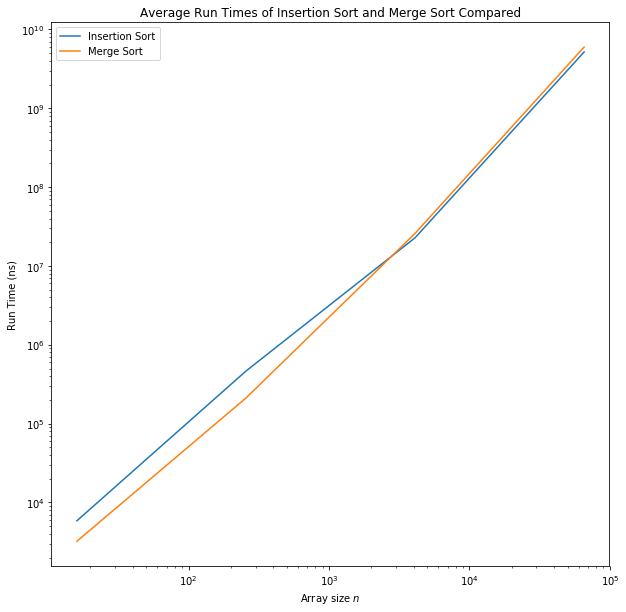

| $n$ | Insertion Sort | Merge Sort |
|:---|:---:|:---:|
| 16 | 5837.2 | 3212.3 |
| 256 | 4.6384e+05 | 2.1104e+05 |
| 4096 | 2.2769e+07 | 2.5858e+07 |
| 65536 | 5.1882e+09 | 5.9773e+09 |


In [17]:
import matplotlib.pyplot as plt
import IPython

plt.rcParams['figure.figsize'] = [10, 10]
plt.plot(labels, insertion_mean, label='Insertion Sort')
plt.plot(labels, merge_mean, label='Merge Sort')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Array size $n$")
plt.ylabel('Run Time (ns)')
plt.title("Average Run Times of Insertion Sort and Merge Sort Compared")
plt.show()

table = "| $n$ | Insertion Sort | Merge Sort |\n|:---|:---:|:---:|\n"
for i in range(len(labels)):
    table += "| {n} | {ins:.5} | {ms:.5} |\n".format(
        n=labels[i], 
        ins=insertion_mean[i], 
        ms=merge_mean[i]
    )
IPython.display.Markdown(table)